# TP2 Traffic Prediction using LSTM Model
Authors :
- Léonie LECAM
- Quentin DEGIOVANNI
- Matteo COUCHOUD

## Dependancies
The following dependencies were used for this exercise.

In [25]:
# Import des dépendances
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Dataset

![alt text](image.png)\
The dataset used in this exercise is 

Dataset include road traffic related data from the express way S6 in Poland.\
Data retrieved covers the period from 2014 to 2017.


[Link to the dataset webpage](https://mostwiedzy.pl/en/open-research-data/permanent-traffic-counting-stations-expressway-s6-in-gdansk-dataset-containing-5-min-aggregated-traf,923120743943369-0) 

<h3 style="color:lightblue;">The goal of this exercise will be to predict traffic (avg. volume and speed) from weather data, using LSTM AI Model.</h3>
We feel predicting the average volume and traffic speed is enough to get a rough idea if a road is congested or not.

### Dataset Import

In [26]:
df = pd.read_excel("Expressway_S6_Gdansk_5min.xlsx")

### Dataset Study

In [27]:
print("Shape of dataset (R/C) : " + str(df.shape))
display(df)



Shape of dataset (R/C) : (306653, 51)


,interval,day of week,type of day,season,daytime,rain_intensity,rain_state,road_surface,temperature,visibility,...,gap_front_l2,gap_front_l2_pc,gap_front_l2_hv,gap_behind,gap_behind_l1,gap_behind_l1_pc,gap_behind_l1_hv,gap_behind_l2,gap_behind_l2_pc,gap_behind_l2_hv
0,2014-03-01 00:00:00,Sat,0,Spring,night,12.1,0.0,2.0,3.7,5.0,...,49.0,49.0,NaN,77,18.0,18.0,NaN,300.0,300.0,NaN
1,2014-03-01 00:05:00,Sat,0,Spring,night,12.1,0.0,2.0,3.7,5.0,...,NaN,NaN,NaN,21,21.0,20.0,32.0,NaN,NaN,NaN
2,2014-03-01 00:10:00,Sat,0,Spring,night,13.6,0.0,2.0,3.6,5.0,...,NaN,NaN,NaN,38,38.0,38.0,NaN,NaN,NaN,NaN
3,2014-03-01 00:16:00,Sat,0,Spring,night,13.6,0.0,2.0,3.6,5.0,...,NaN,NaN,NaN,37,37.0,37.0,NaN,NaN,NaN,NaN
4,2014-03-01 00:21:00,Sat,0,Spring,night,12.5,0.0,2.0,3.5,5.0,...,535.0,535.0,NaN,58,36.0,40.0,24.0,156.0,156.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306648,2017-02-05 23:35:00,Sun,0,Winter,night,NaN,NaN,NaN,NaN,NaN,...,98.0,98.0,NaN,35,22.0,22.0,NaN,103.0,103.0,NaN
306649,2017-02-05 23:41:00,Sun,0,Winter,night,NaN,NaN,NaN,NaN,NaN,...,276.0,276.0,NaN,32,15.0,13.0,21.0,328.0,328.0,NaN
306650,2017-02-05 23:45:00,Sun,0,Winter,night,NaN,NaN,NaN,NaN,NaN,...,121.0,121.0,NaN,30,20.0,21.0,14.0,77.0,77.0,NaN
306651,2017-02-05 23:50:00,Sun,0,Winter,night,NaN,NaN,NaN,NaN,NaN,...,118.0,118.0,NaN,31,16.0,18.0,10.0,120.0,120.0,NaN


### Cleaning the dataset

Cleaning done :
1. Removing columns we wont be using. We only keep data related to the weather and traffic size (interval to volume)
2. Removing lines with missing or incomplete data.


Bafore cleaning :
- 306 653 rows
- 51 columns

After cleaning :
-  23 031 rows
-  51 columns

In [28]:
# We keep only the columns we need

df = df[['interval', 'day of week', 'type of day', 'season', 'daytime', 'rain_intensity', 'rain_state', 'road_surface', 'temperature', 'visibility', 'avg_speed', 'volume']]


In [62]:
# We get rid of rows with NaN or missing values
df_cleaned = df.dropna()
print("New shape of the dataframe (L/C) : " + str(df.shape))
display(df_cleaned)

New shape of the dataframe (L/C) : (306653, 12)


,interval,day of week,type of day,season,daytime,rain_intensity,rain_state,road_surface,temperature,visibility,avg_speed,volume
0,2014-03-01 00:00:00,Sat,0,Spring,night,12.1,0.0,2.0,3.7,5.0,106.0,228
1,2014-03-01 00:05:00,Sat,0,Spring,night,12.1,0.0,2.0,3.7,5.0,103.5,180
2,2014-03-01 00:10:00,Sat,0,Spring,night,13.6,0.0,2.0,3.6,5.0,98.4,108
3,2014-03-01 00:16:00,Sat,0,Spring,night,13.6,0.0,2.0,3.6,5.0,110.5,96
4,2014-03-01 00:21:00,Sat,0,Spring,night,12.5,0.0,2.0,3.5,5.0,98.0,132
...,...,...,...,...,...,...,...,...,...,...,...,...
296268,2016-12-31 22:35:00,Sat,1,Winter,night,14.3,0.0,2.0,3.7,6.0,104.9,180
296269,2016-12-31 22:40:00,Sat,1,Winter,night,14.0,0.0,2.0,3.8,6.0,107.7,252
296270,2016-12-31 22:45:00,Sat,1,Winter,night,14.0,0.0,2.0,3.8,6.0,101.9,300
296271,2016-12-31 22:50:00,Sat,1,Winter,night,14.3,0.0,2.0,3.9,6.0,97.0,252


### Variable discovery analysis
We will do the following things in order to discover each variable :
- measure the variance
- measure the mean values
- measure the median values
- measure extremums (min and max)

In [30]:
# We measure the variance for each column that is not a timestamp or string
# Thus we exclude the 'interval', 'day of week' 'season' and 'daytime' columns
# We put the results in a new dataframe called 'disc_df', with column names as rows and variance as the column

disc_df = pd.DataFrame(columns=['variance'],)
for column in df.columns:
    if column not in ['interval', 'day of week', 'season', 'daytime']:
        disc_df.loc[column] = df[column].var()
        disc_df.loc[column, 'mean'] = df[column].mean()
        disc_df.loc[column, 'std'] = df[column].std()
        disc_df.loc[column, 'median'] = df[column].median()
        disc_df.loc[column, 'min'] = df[column].min()
        disc_df.loc[column, 'max'] = df[column].max()



In [38]:
display(disc_df)

,variance,mean,std,median,min,max
type of day,6.917917e-01,0.516147,0.831740,0.0,0.0,2.0
rain_intensity,4.001218e+02,9.038887,20.003044,0.0,0.0,97.9
rain_state,3.750462e-01,0.198309,0.612410,0.0,0.0,5.0
road_surface,8.845520e-01,0.689229,0.940506,0.0,0.0,3.0
temperature,5.986021e+01,11.382956,7.736938,10.9,-14.7,39.4
visibility,1.912544e+00,7.187813,1.382948,8.0,0.0,9.0
avg_speed,9.233596e+01,98.982568,9.609160,100.0,5.8,187.7
volume,1.037551e+06,1466.945792,1018.602418,1500.0,12.0,4380.0


Now that everything is cleared, we need to keep in mind AI based models compute numbers and not words.\
Thus, we identified 3 columns that needs some change from categorical (words) to numbers.

**Day of week :**

| Word | Number equivalent |
| - | - |
| Monday | 0 |
| Tuesday | 1 |
| Wednesday | 2 |
| Thursday | 3 |
| Friday | 4 |
| Saturday | 5 |
| Sunday | 6 |

**Season :**

| Word | Number equivalent |
| - | - |
| Spring | 0 |
| Summer | 1 |
| Autumn | 2 |
| Winter | 3 |

**Daytime:**

| Word | Number equivalent |
| - | - |
| day | 0 |
| night | 1 |




In [63]:
# We now change categorical values to numerical values for day of week, season, daytime (day or night)

df_cleaned['day of week'] = df_cleaned['day of week'].replace({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})
df_cleaned['season'] = df_cleaned['season'].replace({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3})
df_cleaned['daytime'] = df_cleaned['daytime'].replace({'night': 0, 'dawn': 1, 'day': 2, 'dusk': 3})
display(df_cleaned)

C:\Users\scedr\AppData\Local\Temp\ipykernel_24724\1141791900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['day of week'] = df_cleaned['day of week'].replace({'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6})
C:\Users\scedr\AppData\Local\Temp\ipykernel_24724\1141791900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['season'] = df_cleaned['season'].replace({'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3})
C:\Users\scedr\AppData\Local\Temp\ipykernel_24

,interval,day of week,type of day,season,daytime,rain_intensity,rain_state,road_surface,temperature,visibility,avg_speed,volume
0,2014-03-01 00:00:00,5,0,1,0,12.1,0.0,2.0,3.7,5.0,106.0,228
1,2014-03-01 00:05:00,5,0,1,0,12.1,0.0,2.0,3.7,5.0,103.5,180
2,2014-03-01 00:10:00,5,0,1,0,13.6,0.0,2.0,3.6,5.0,98.4,108
3,2014-03-01 00:16:00,5,0,1,0,13.6,0.0,2.0,3.6,5.0,110.5,96
4,2014-03-01 00:21:00,5,0,1,0,12.5,0.0,2.0,3.5,5.0,98.0,132
...,...,...,...,...,...,...,...,...,...,...,...,...
296268,2016-12-31 22:35:00,5,1,0,0,14.3,0.0,2.0,3.7,6.0,104.9,180
296269,2016-12-31 22:40:00,5,1,0,0,14.0,0.0,2.0,3.8,6.0,107.7,252
296270,2016-12-31 22:45:00,5,1,0,0,14.0,0.0,2.0,3.8,6.0,101.9,300
296271,2016-12-31 22:50:00,5,1,0,0,14.3,0.0,2.0,3.9,6.0,97.0,252


In [64]:
#We verify for no NaN values
#We check the columns with NaN values
print("Columns with NaN values :")
print(df_cleaned.columns[df_cleaned.isnull().any()].tolist())



Columns with NaN values :
[]


In [65]:
#We add a column with the time between two intervals
df_inter = df_cleaned.copy()
df_inter['time_between_intervals'] = df_cleaned['interval'].diff().dt.total_seconds().fillna(0)
# We drop interval column
df_inter = df_inter.drop(columns=['interval'])
display(df_inter)



,day of week,type of day,season,daytime,rain_intensity,rain_state,road_surface,temperature,visibility,avg_speed,volume,time_between_intervals
0,5,0,1,0,12.1,0.0,2.0,3.7,5.0,106.0,228,0.0
1,5,0,1,0,12.1,0.0,2.0,3.7,5.0,103.5,180,300.0
2,5,0,1,0,13.6,0.0,2.0,3.6,5.0,98.4,108,300.0
3,5,0,1,0,13.6,0.0,2.0,3.6,5.0,110.5,96,360.0
4,5,0,1,0,12.5,0.0,2.0,3.5,5.0,98.0,132,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
296268,5,1,0,0,14.3,0.0,2.0,3.7,6.0,104.9,180,300.0
296269,5,1,0,0,14.0,0.0,2.0,3.8,6.0,107.7,252,300.0
296270,5,1,0,0,14.0,0.0,2.0,3.8,6.0,101.9,300,300.0
296271,5,1,0,0,14.3,0.0,2.0,3.9,6.0,97.0,252,300.0


AI based models work better with data kept between 0 and 1, because it makes converging toward a solution algorithmically faster ([Source : Stackoverflow](https://stackoverflow.com/questions/46597877/normalizing-to-0-1-vs-1-1)).\
We will thus be normalizing data between 0 and 1 to improve model performance and faster training.



In [66]:
#We normalize the data for the columns that are not categorical (rain_intensity, road_surface, temperature, visibility, avg_speed, volume and time_between_intervals)
#Normalisation is done between 0 and 1

df_norma = df_inter.copy()

for column in df_norma.columns:
    if column not in ['interval', 'day of week', 'season', 'daytime']:
        # We normalize the column by substracting the minimum and dividing by the difference between the maximum and the minimum
        df_norma[column] = (df_norma[column] - df_norma[column].min()) / (df_norma[column].max() - df_norma[column].min())

display(df_norma)

,day of week,type of day,season,daytime,rain_intensity,rain_state,road_surface,temperature,visibility,avg_speed,volume,time_between_intervals
0,5,0.0,1,0,0.123596,0.0,0.666667,0.340111,0.555556,0.550852,0.049451,0.000000
1,5,0.0,1,0,0.123596,0.0,0.666667,0.340111,0.555556,0.537108,0.038462,0.002511
2,5,0.0,1,0,0.138917,0.0,0.666667,0.338262,0.555556,0.509071,0.021978,0.002511
3,5,0.0,1,0,0.138917,0.0,0.666667,0.338262,0.555556,0.575591,0.019231,0.003014
4,5,0.0,1,0,0.127681,0.0,0.666667,0.336414,0.555556,0.506872,0.027473,0.002511
...,...,...,...,...,...,...,...,...,...,...,...,...
296268,5,0.5,0,0,0.146067,0.0,0.666667,0.340111,0.666667,0.544805,0.038462,0.002511
296269,5,0.5,0,0,0.143003,0.0,0.666667,0.341959,0.666667,0.560198,0.054945,0.002511
296270,5,0.5,0,0,0.143003,0.0,0.666667,0.341959,0.666667,0.528312,0.065934,0.002511
296271,5,0.5,0,0,0.146067,0.0,0.666667,0.343808,0.666667,0.501374,0.054945,0.002511


In [67]:
#We verify for no NaN values
#We check the columns with NaN values
print("Columns with NaN values :")
print(df_cleaned.columns[df_cleaned.isnull().any()].tolist())

Columns with NaN values :
[]


### Preparing training and testing sets
Dataset is split in two sets for training and testing our LSTM model.\
The split is 80% toward training and 20% toward testing.

In [68]:
# We prepare a training and a test set by splitting the data 80%/20%

from sklearn.model_selection import train_test_split

train, test = train_test_split(df_norma, test_size=0.2)
# We display the shape of the training and test sets
print("Shape of training set (R/C) : " + str(train.shape))
print("Shape of test set (R/C) : " + str(test.shape))

Shape of training set (R/C) : (235978, 12)
Shape of test set (R/C) : (58995, 12)


In [79]:
#We prepare the data for the model
#We separate the features and the target variables avg_speed and volume
#We also drop the interval column

X_train = train.drop(columns=['avg_speed', 'volume'])
y_train = train[['avg_speed', 'volume']]

X_test = test.drop(columns=['avg_speed', 'volume'])
y_test = test[['avg_speed', 'volume']]



In [80]:
# All data is to be converted to float32
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

## Using LSTM Model

### Model parameters

In [114]:
# Parameters

activation = 'sigmoid'
epochs = 5

In [115]:
#We create a LSTM model with Keras
#The model has 2 output neurones, one for the average speed and one for the average volume

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(10, input_shape=(X_train.shape[1], 1)))
model.add(Dense(32))
model.add(Dense(2, activation=activation))
model.compile(optimizer='adam', loss='mse')


In [116]:
# We train the model and measure MSE and RMSE

training = model.fit(X_train, y_train, epochs=epochs, batch_size=32)
# We measure average loss and RMSE
loss = training.history['loss'][-1]
rmse = np.sqrt(loss)


Epoch 1/5
7375/7375 [==============================] - 19s 2ms/step - loss: 0.0155
Epoch 2/5
7375/7375 [==============================] - 17s 2ms/step - loss: 0.0115
Epoch 3/5
7375/7375 [==============================] - 18s 2ms/step - loss: 0.0110
Epoch 4/5
7375/7375 [==============================] - 18s 2ms/step - loss: 0.0107
Epoch 5/5
7375/7375 [==============================] - 18s 2ms/step - loss: 0.0104


In [117]:
#Print the results
print("Loss : " + str(loss))
print("RMSE : " + str(rmse))

Loss : 0.010393367148935795
RMSE : 0.10194786485716999


In [118]:
# We evaluate the model and calculate the MSE and RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print("Epochs : " + str(epochs))
print("Activation function : " + activation)
print("MSE : " + str(mse))
print("RMSE : " + str(rmse))



1844/1844 [==============================] - 2s 1ms/step
Epochs : 5
Activation function : sigmoid
MSE : 0.010135
RMSE : 0.10067273533725986


### Model Performance Evaluation

We tested our model by varying the number of epochs and activation function.\
Performance results are the following :\

| Activation function | Epochs | Train MSE | Train RMSE | Test MSE | Test RMSE | Training TIME | Test TIME |
| - | - | - | - | - | - | - | - |
| relu | 5 | 0.009 | 0.097 | 0.010 | 0.100 | 101s | 2s |
| relu | 1 | 0.084 | 0.291 | 0.085 | 0.291 | 21s | 2s |
| sigmoid | 5 | 0.011 | 0.105 | 0.011 | 0.010 | 116s | 2s |
| sigmoid | 1 | 0.016 | 0.127 | 0.012 | 0.110 | 19s | 2s |


Best testing results are with the `sigmoid` activation function and `5` epochs. Training time takes slightly longer, yet yield better **testing** results in the end, especialy RMSE.\

With these performance, we can say our model can predict traffic avg. speed and volume pretty accurately. Yet, our model could be more optimized. In fact we could have played on the structure of the model, or the optimizer (which is `adam` in this case).

### Discussing the results
In this part, we measure the potency of our model prediction.

We measure :
- The Gaussian distibution of the errors for avg. speed and volume
- For the maximum error :
    - The predicted value
    - The true value
    - The distance between the two
    - The error percentage

In [119]:
# We get the average speed and volume predictions for the test set and display it in a dataframe
df_pred = pd.DataFrame(y_pred, columns=['avg_speed', 'volume'])
display(df_pred)

,avg_speed,volume
0,0.520861,0.122965
1,0.535228,0.322620
2,0.520227,0.419080
3,0.531123,0.235143
4,0.540324,0.084216
...,...,...
58990,0.512065,0.112083
58991,0.479235,0.078284
58992,0.530013,0.101852
58993,0.538258,0.125187


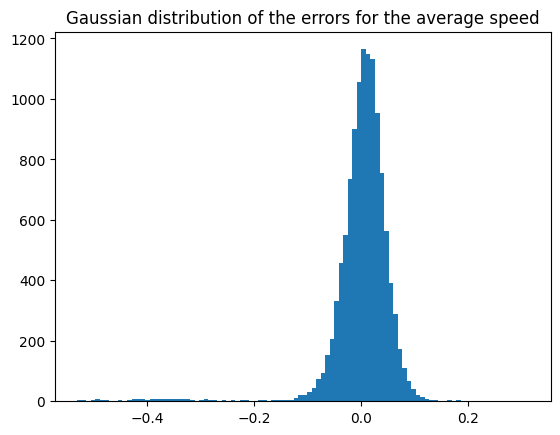

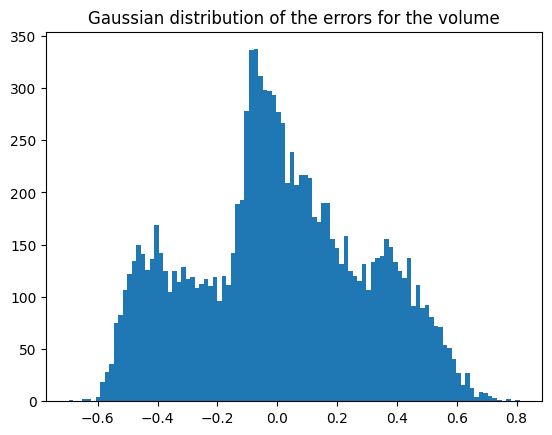

Max error for average speed :
Predicted value : 0.5408221
Actual value : 0.009895547
Distance : 0.5309265
Percentage of the error : 5365.307235717773%
Max error for volume :
Predicted value : 0.096408874
Actual value : 0.9065934
Distance : 0.8101845
Percentage of the error : 89.36580419540405%


In [132]:
# We plot the gaussian distribution of the errors for the average speed and volume

# For the average speed
plt.hist(y_test['avg_speed'] - df_pred['avg_speed'], bins=100)
plt.title('Gaussian distribution of the errors for the average speed')
plt.show()


# For the volume
plt.hist(y_test['volume'] - df_pred['volume'], bins=100)
plt.title('Gaussian distribution of the errors for the volume')
plt.show()


# We display for the maximum error :
# The predicted value
# The actual value
# The difference between the two


# max error for average speed
max_speed_error = (y_test['avg_speed'] - df_pred['avg_speed']).abs().idxmax()
print("=====================================")
print("Max error for average speed :")
print("Predicted value : " + str(df_pred['avg_speed'][max_speed_error]))
print("Actual value : " + str(y_test['avg_speed'][max_speed_error]))
# distance (absolute value of the difference) between the predicted and actual values
print("Distance : " + str((abs(y_test['avg_speed'][max_speed_error] - df_pred['avg_speed'][max_speed_error]))))
# Percentage of the error
print("Percentage of the error : " + str((abs(y_test['avg_speed'][max_speed_error] - df_pred['avg_speed'][max_speed_error]) / y_test['avg_speed'][max_speed_error]) * 100) + "%")


# max error for volume
max_volume_error = (y_test['volume'] - df_pred['volume']).abs().idxmax()
print("=====================================")
print("Max error for volume :")
print("Predicted value : " + str(df_pred['volume'][max_volume_error]))
print("Actual value : " + str(y_test['volume'][max_volume_error]))
# distance (absolute value of the difference) between the predicted and actual values
print("Distance : " + str((abs(y_test['volume'][max_volume_error] - df_pred['volume'][max_volume_error]))))
# Percentage of the error
print("Percentage of the error : " + str((abs(y_test['volume'][max_volume_error] - df_pred['volume'][max_volume_error]) / y_test['volume'][max_volume_error]) * 100) + "%")




The gaussian distribution tells us that our models seems pretty accurate when it comes to predicting the average speed or the traffic, based on weather and time related data. Most of it's prediction are along or near 0. But, it shows us the model finds it more difficult to predict the volume of the traffic. The volume distibution is much more horizontal.

These difficulties don't seem to reflect very well on the metrics, the percentage error being far bigger for avg. speed than volume. But these data are not comparable (not the same scale), thus the gaussian distribution is still one of the best metrics to judge de performance of the model.

## In conclusion

The use of LSTM is a first for us. We thus learned that LSTM are pretty useful when it comes to predicting results based on time-related data.\
Our model seems capable of predicting the traffic related data such as volume and average speed, based on weather and time (day, hour...), consistently. But, as said earlier, there appear to have room for improvement, especially in the prediction of volume.